# Laboratorio 02 - Ejercicio 2
### Uso del método de Euler

Integrantes:
- Ricardo Méndez, 21289
- Sara Echeverría, 21371
- Melissa Pérez, 21385

### 2.1. Crecimiento poblacional
Con el modelo: **dy/dx = k ( 1 - y/N ) y**

Después de 4 días, una población inicial de mariposas de 15 crece a 56. Si el ecosistema restringido alberga 300 mariposas, ¿cuántas mariposas habrá en 12 días?

In [1]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [2]:
# Calculo de la constante k
N = 300
y0 = 15
y4 = 56
ti = 0
tf = 4

def equation(k):
    t = tf
    C = N / y0 - 1
    return y4 - N / (1 + C * np.exp(-k * t))

k_initial_guess = 0.1
k_value = fsolve(equation, k_initial_guess)[0]

In [3]:
k_value

0.36815561115209694

In [4]:
# Aplicación de la ecuación diferencial
ti = 0
tf = 12
h = 0.1

def dydt(t, y):
    return k_value * y * (1 - y / N)

t_values = np.arange(ti, tf + h, h)
y_values = np.zeros(len(t_values))
y_values[0] = y0

for i in range(1, len(t_values)):
    y_values[i] = y_values[i-1] + h * dydt(t_values[i-1], y_values[i-1])

y_after_12_days = y_values[-1]

In [5]:
y_after_12_days

243.08211095612606

Suponiendo que la población de mariposas crece más rápido cuando hay 150 mariposas, ¿cuándo sucede esto?

In [9]:
from scipy.optimize import fsolve

# calculate k
N = 300
y0 = 15
y4 = 56
t_initial = 0
t_final = 4

def equation(k):
    t = t_final
    C = N / y0 - 1
    return y4 - N / (1 + C * np.exp(-k * t))

k_initial_guess = 0.1
k_value = fsolve(equation, k_initial_guess)[0]

In [10]:
# find the moment when the population reaches 150 individuals
y_target = 150

def population_at_time(t):
    C = N / y0 - 1
    return y_target - N / (1 + C * np.exp(-k_value * t))

t_guess = 5
time_to_target = fsolve(population_at_time, t_guess)[0]

time_to_target

7.99781095268978

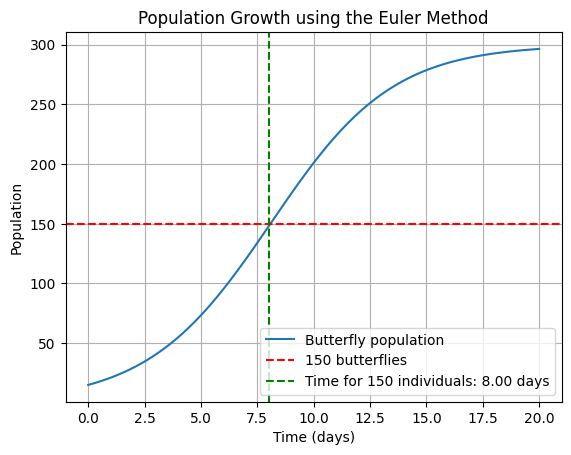

7.99781095268978

In [14]:
# Euler method
k = k_value
t0 = 0
t_end = 20
h = 0.1

def dydt(t, y):
    return k * (1 - y / N) * y

t_values = np.arange(t0, t_end + h, h)
y_values = np.zeros(len(t_values))
y_values[0] = y0

for i in range(1, len(t_values)):
    y_values[i] = y_values[i-1] + h * dydt(t_values[i-1], y_values[i-1])

plt.plot(t_values, y_values, label='Butterfly population')
plt.axhline(y=150, color='r', linestyle='--', label='150 butterflies')
plt.axvline(x=time_to_target, color='g', linestyle='--', label=f'Time for 150 individuals: {time_to_target:.2f} days')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title('Population Growth using the Euler Method')
plt.legend()
plt.grid(True)
plt.show()

time_to_target


### 2.2. Crecimiento Epidemiológico
En un pueblo aislado se propaga una enfermedad según el modelo SIR. Inicialmente hay 990 individuos susceptibles (_S_), 10 individuos infectados (_I_) y 0 individuos recuperados (_R_). La tasa de infección (_𝛽_) es 0.3 y la tasa de recuperación (_𝛾_) es 0.1

Utilizando el método de Euler, estime el número de individuos susceptibles, infectados y recuperados durante un período de 50 días. Utilice un tamaño de paso (_Δt_) de 0.1 días.